In [85]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [86]:
def SUM (circuit, a):
    circuit.cx(a+1,a+2)
    circuit.cx(a,a+2)


In [87]:
def CARRY (circuit, a):
    circuit.ccx(a+1,a+2,a+3)
    circuit.cx(a+1,a+2)
    circuit.ccx(a,a+2,a+3)

In [88]:
def CARRYI (circuit, a):
    circuit.ccx(a,a+2,a+3)
    circuit.cx(a+1,a+2)
    circuit.ccx(a+1,a+2,a+3)

In [89]:
#Creating a function to change value of a 3 bit number
def value1 (circuit, a, b):
    if a == 1:
        circuit.x(1)
    if b == 1:
        circuit.x(2)
    # if c == 1:
    #     circuit.x(7)    

In [90]:
def value2 (circuit, a, b):
    if a == 1:
        circuit.x(4)
    if b == 1:
        circuit.x(5)
    # if c == 1:
    #     circuit.x(8) 

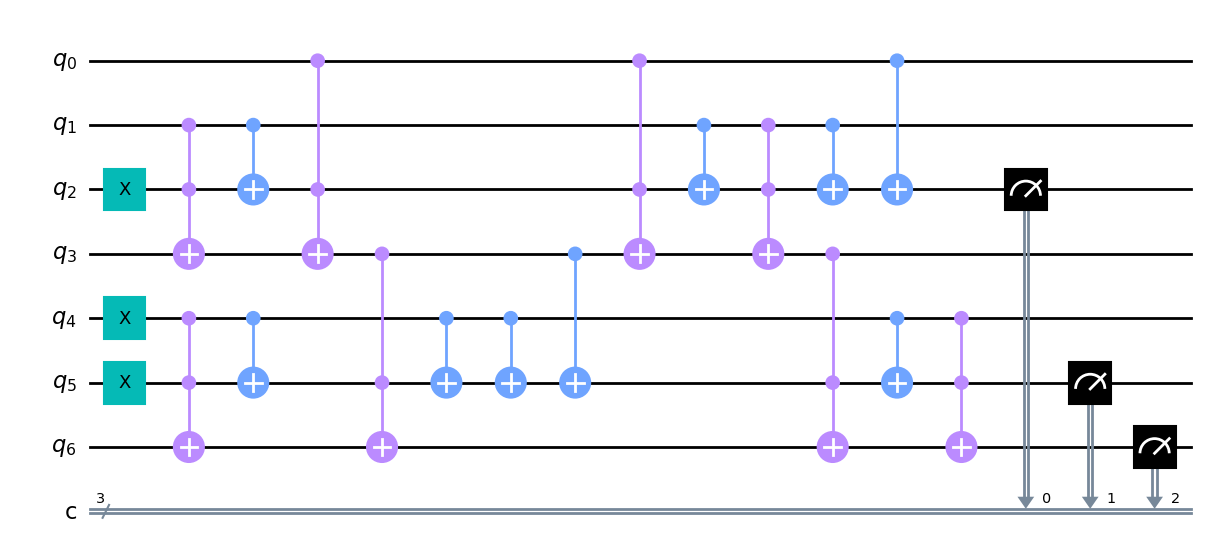

In [91]:
qc = QuantumCircuit(7,3)
#quantum half adder, sum and carry
value1(qc,0,1)
value2(qc,1,1)
CARRY(qc,0)
CARRY(qc,3)
qc.cx(4,5)
SUM(qc,3)
CARRYI(qc,0)
CARRYI(qc,3)
SUM(qc,0)
#measuring classical output
qc.measure(2,0)
qc.measure(5,1)
qc.measure(6,2)
qc.draw('mpl')

In [92]:
from qiskit import QuantumCircuit, Aer, execute
provider = IBMQ.load_account()
backend = provider.get_backend('ibm_nairobi')
job = execute(qc, backend, shots=20000)
result = job.result()
counts = result.get_counts()
#reverse output
counts = {k[::-1]: v for k,v in counts.items()}
print(counts)
plot_histogram(counts)

ibmqfactory.load_account:WARNING:2023-04-28 04:52:29,491: Credentials are already in use. The existing account in the session will be replaced.


KeyboardInterrupt: 

{'110': 20000}


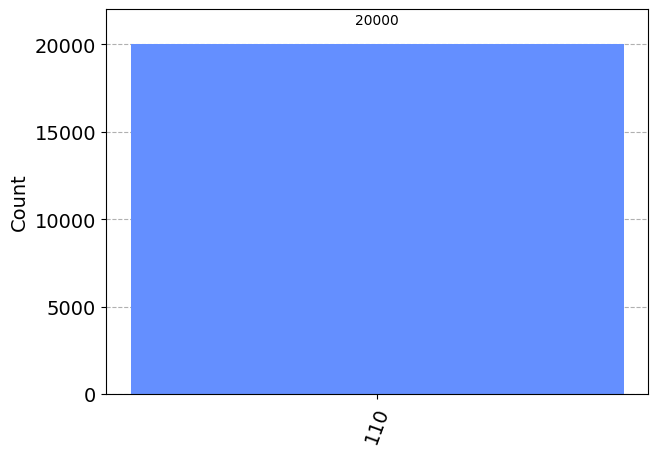

In [ ]:
#executing on simulator and plotting histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=20000)
result = job.result()
counts = result.get_counts()
#reverse output
counts = {k[::-1]: v for k,v in counts.items()}
print(counts)
plot_histogram(counts)
